In [1]:
import numpy as np
from astropy.io import fits 
import matplotlib.pyplot as plt 
import astropy.constants as const

import matplotlib
font = {'size'   : 18}

matplotlib.rc('font', **font)

In [2]:
obs = np.loadtxt("/home/milic/data/atlas_regions/394_5.txt", skiprows=1, usecols=(0,1), delimiter=',', unpack=True)

## Average the part very far from the limb and substract to correct roughly for the stray light!

In [3]:
obs.shape

(2, 4535)

In [4]:
synth_c = fits.open("atlas_disk_center.fits")[0].data
synth_ccc = fits.open("atlas_disk_center_cc.fits")[0].data

In [5]:
synth_c.shape

(2001,)

In [6]:
atlas_wavegrid = np.linspace(391.0, 396.0, 2001)

In [7]:
# Macroturbulence? Does not change anything
from scipy.ndimage import gaussian_filter1d
width =   np.mean(atlas_wavegrid) * 10.0 / 3E5 / (atlas_wavegrid[1] - atlas_wavegrid[0]) / 2.35
print (width)
synth_c = gaussian_filter1d(synth_c, width)

2.2326241134772076


<>:5: SyntaxWarning: invalid escape sequence '\l'
<>:5: SyntaxWarning: invalid escape sequence '\l'
/tmp/ipykernel_2286/4016803153.py:5: SyntaxWarning: invalid escape sequence '\l'
  plt.xlabel("$\lambda$ [nm]")


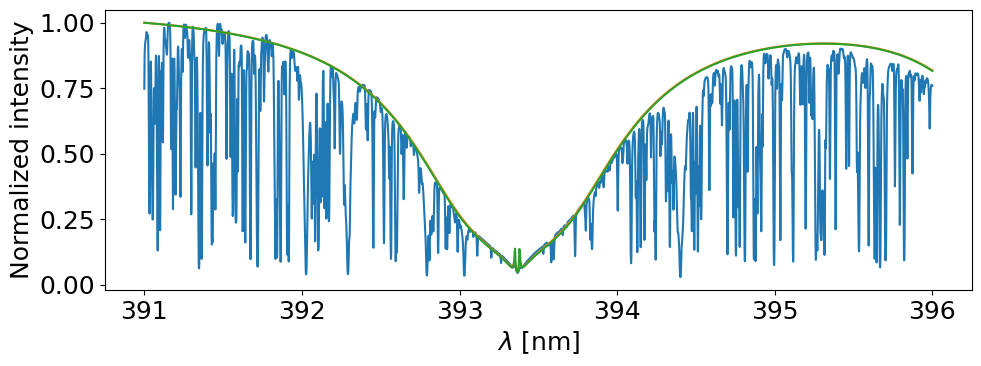

In [8]:
plt.figure(figsize=[10,4])
plt.plot(obs[0]/10.0, obs[1]/np.amax(obs[1]))
plt.plot(atlas_wavegrid, synth_c/np.amax(synth_c))
plt.plot(atlas_wavegrid, synth_ccc/np.amax(synth_ccc))
plt.xlabel("$\lambda$ [nm]")
plt.ylabel("Normalized intensity")
plt.tight_layout()
plt.savefig("lw_vs_atlas.png",bbox_inches='tight')

<>:7: SyntaxWarning: invalid escape sequence '\l'
<>:7: SyntaxWarning: invalid escape sequence '\l'
/tmp/ipykernel_2286/141291413.py:7: SyntaxWarning: invalid escape sequence '\l'
  plt.xlabel("$\lambda$ [nm]")


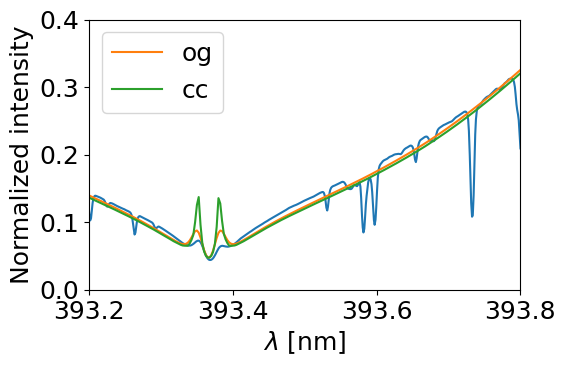

In [9]:
plt.figure(figsize=[6,4])
plt.plot(obs[0]/10.0, obs[1]/np.amax(obs[1]))
plt.plot(atlas_wavegrid, synth_c/np.amax(synth_c), label='og')
plt.plot(atlas_wavegrid, synth_ccc/np.amax(synth_ccc), label = 'cc')
plt.xlim([393.2, 393.8])
plt.ylim([0.0,0.4])
plt.xlabel("$\lambda$ [nm]")
plt.ylabel("Normalized intensity")
plt.legend()
plt.tight_layout()
plt.savefig("lw_vs_atlas_zoom.png",bbox_inches='tight')

In [42]:
susi_spec = fits.open("/home/milic/data/20240713_215257_15937007-20240713_215500_15954265-cam1_bin_1_1_1_full.fits")[0].data
susi_spec.shape

(4, 471, 1557, 1912)

In [43]:
spectra = np.copy(susi_spec[0])
del(susi_spec)

In [52]:
mean = np.mean(spectra, axis=0)

In [15]:
#del(susi_spec)

In [53]:
mean.shape

(1557, 1912)

In [54]:
susi_wavegrid = np.linspace(392.81432, 394.77057, 1912)

In [55]:
mean_spatially = np.mean(mean, axis=0)

In [56]:
np.argmax(mean_spatially[0])

0

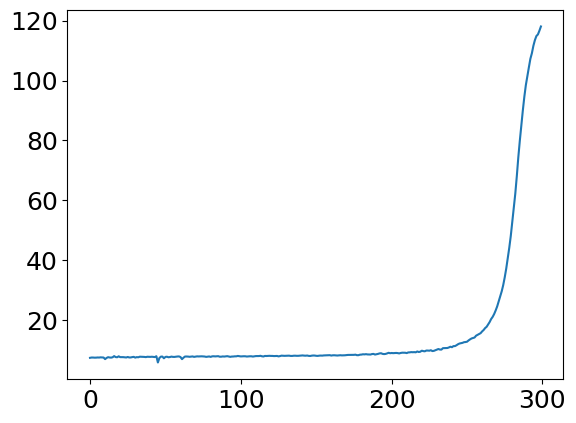

In [58]:
plt.plot(mean[500:800,1865])

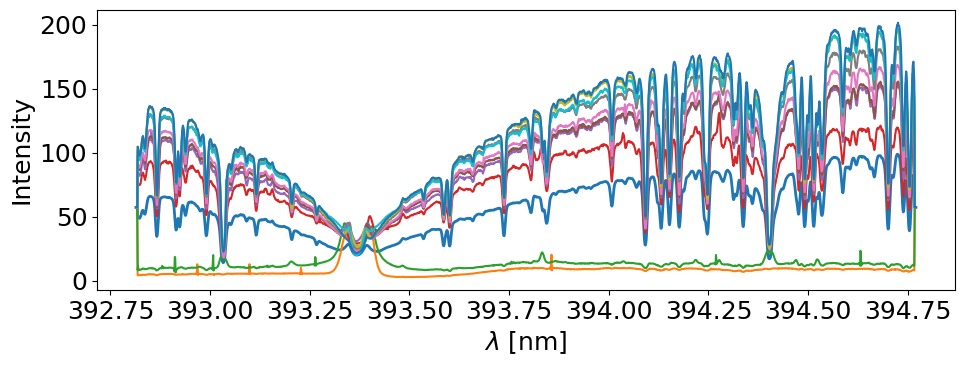

In [61]:
plt.figure(figsize=[10,4])
plt.plot(susi_wavegrid, mean_spatially, linewidth=2)
for i in range(0,10):
    plt.plot(susi_wavegrid, mean[700+50*i])
plt.xlabel("$\\lambda$ [nm]")
plt.ylabel("Intensity")
plt.tight_layout()
plt.savefig("some_emission_spectra.png", bbox_inches='tight')

### Now let's find the limb: 

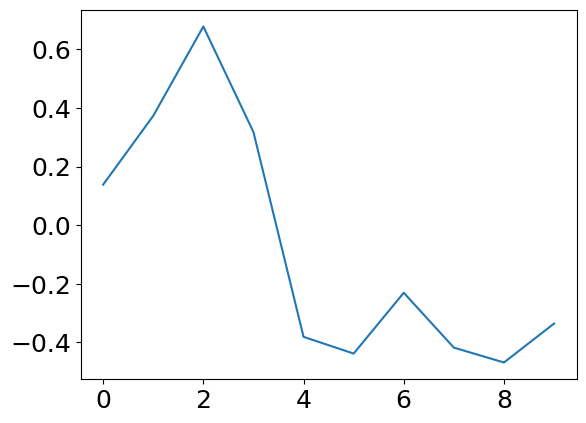

In [63]:
plt.plot(np.gradient(np.gradient(mean[780:790,1865])))

In [61]:
# LIMB IS ROUGHLY @ the index 784!!!

In [64]:
limblocation = 784

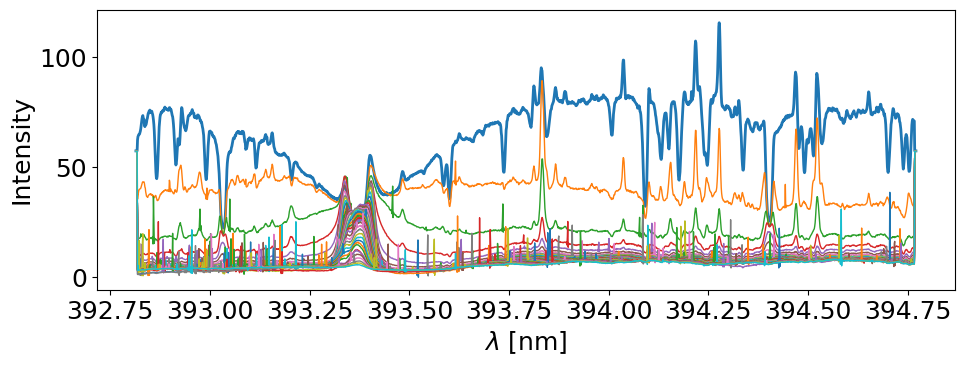

In [67]:
plt.figure(figsize=[10,4])
plt.plot(susi_wavegrid, mean[limblocation], linewidth=2)
for i in range(1,40):
    plt.plot(susi_wavegrid, mean[limblocation-i*10], linewidth=1)
plt.xlabel("$\\lambda$ [nm]")
plt.ylabel("Intensity")
plt.tight_layout()
plt.savefig("limb_emission_spectra.png", bbox_inches='tight')

In [ ]:
plt.figure(figsize=[10,4])
plt.plot(mean[limblocation,450:600], linewidth=2)
for i in range(1,40):
    plt.plot(susi_wavegrid, mean[limblocation-i*10], linewidth=1)
plt.xlabel("$\\lambda$ [nm]")
plt.ylabel("Intensity")
plt.tight_layout()
plt.savefig("limb_emission_spectra.png", bbox_inches='tight')

In [68]:
NX = mean.shape[0]
print (NX)
limbdistances = -(np.arange(NX) - limblocation)*19.25

1557


In [69]:
print (limbdistances)

[ 15092.    15072.75  15053.5  ... -14822.5  -14841.75 -14861.  ]


In [71]:
norm = np.max(mean[:,:])
print (norm)


250.95973


In [72]:
mean[:,:] /= norm

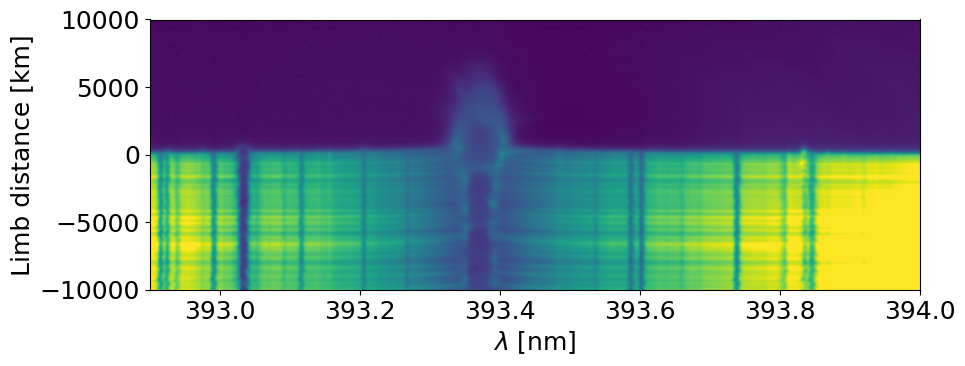

In [75]:
plt.figure(figsize=[10,4])
plt.imshow(mean[:,:], origin='lower', extent=[susi_wavegrid[0],susi_wavegrid[-1], limbdistances[0], limbdistances[-1]], aspect='auto',vmin=0, vmax=0.5)
plt.ylim([-10000,10000])
plt.xlim([392.9, 394])
plt.xlabel("$\\lambda$ [nm]")
plt.ylabel("Limb distance [km]")
plt.tight_layout()
plt.savefig("limb_spectra_2D.png", bbox_inches='tight')

In [76]:
spectra.shape

(471, 1557, 1912)

In [78]:
spectra /= norm

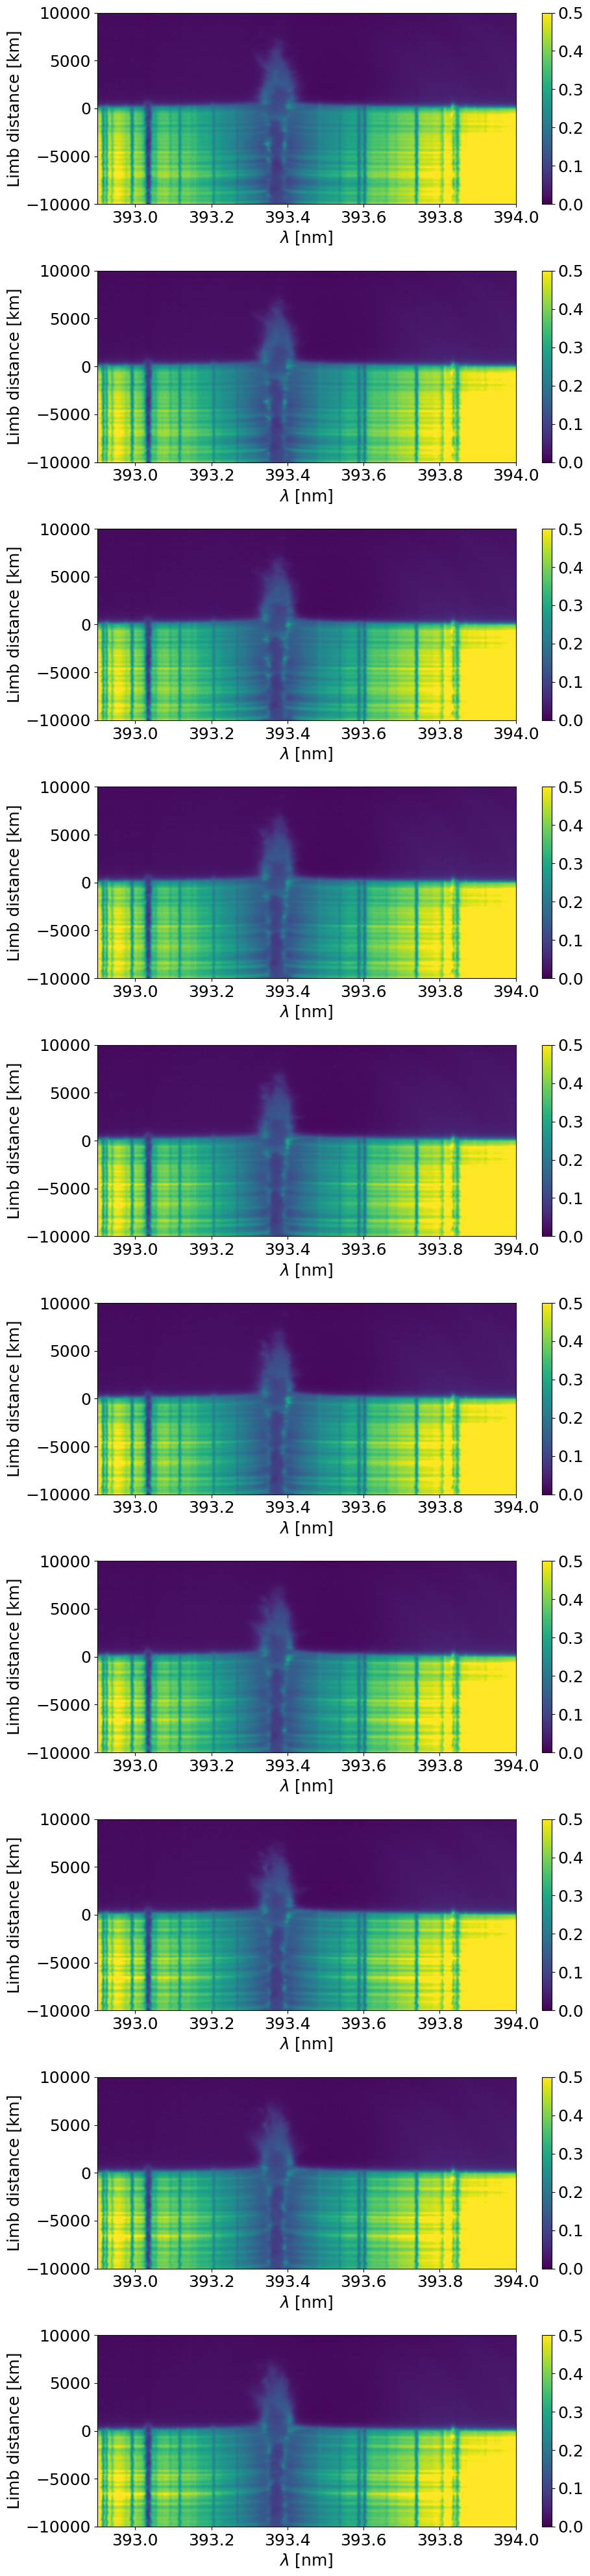

In [82]:
plt.figure(figsize=[10,40])
for t in range(0,10):
    plt.subplot(10,1,t+1)
    plt.imshow(spectra[t*30], origin='lower', extent=[susi_wavegrid[0],susi_wavegrid[-1], limbdistances[0], limbdistances[-1]], aspect='auto', vmin=0, vmax=0.5)
    plt.ylim([-10000,10000])
    plt.xlim([392.9, 394])
    plt.xlabel("$\\lambda$ [nm]")
    plt.ylabel("Limb distance [km]")
    plt.colorbar()


plt.tight_layout()
plt.savefig("limb_spectra_2D_time.png", bbox_inches='tight')

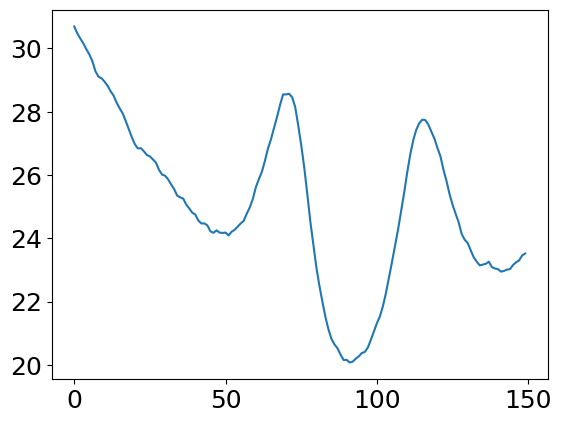

In [131]:
plt.plot(mean_spatially[450:600])

In [85]:
linecore_i = np.mean(spectra[:,:,520:570], axis=2)

In [86]:
linecore_i.shape

(471, 1557)

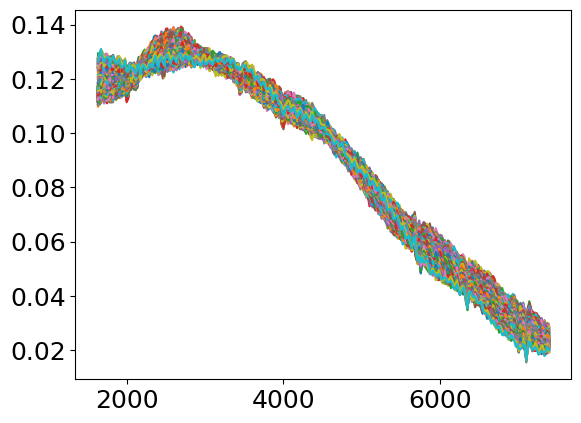

In [96]:
for t in range(50,420):
    plt.plot(limbdistances[400:700], linecore_i[t, 400:700])

In [97]:
limbdistances[500:520]

array([5467.  , 5447.75, 5428.5 , 5409.25, 5390.  , 5370.75, 5351.5 ,
       5332.25, 5313.  , 5293.75, 5274.5 , 5255.25, 5236.  , 5216.75,
       5197.5 , 5178.25, 5159.  , 5139.75, 5120.5 , 5101.25])

In [98]:
mean_off_limb = np.mean(linecore_i[:,500:520], axis=1)

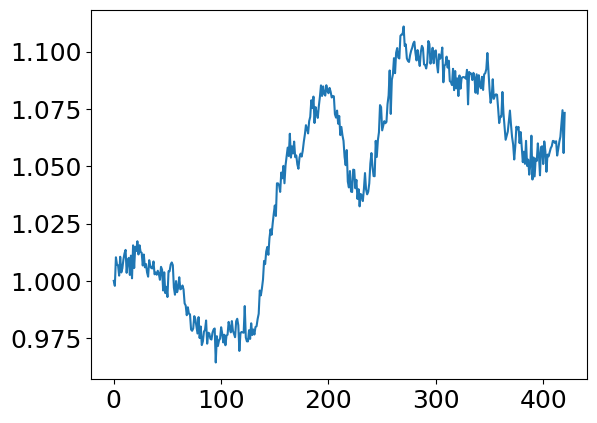

In [102]:
plt.plot(mean_off_limb[:-50]/mean_off_limb[0])

In [118]:
synth_spec[:,:] /= np.max(synth_spec[:,:])

In [103]:
mean_spec_off_limb = np.mean(spectra[:,500:520,:],axis=1)

In [104]:
mean_spec_off_limb.shape

(471, 1912)

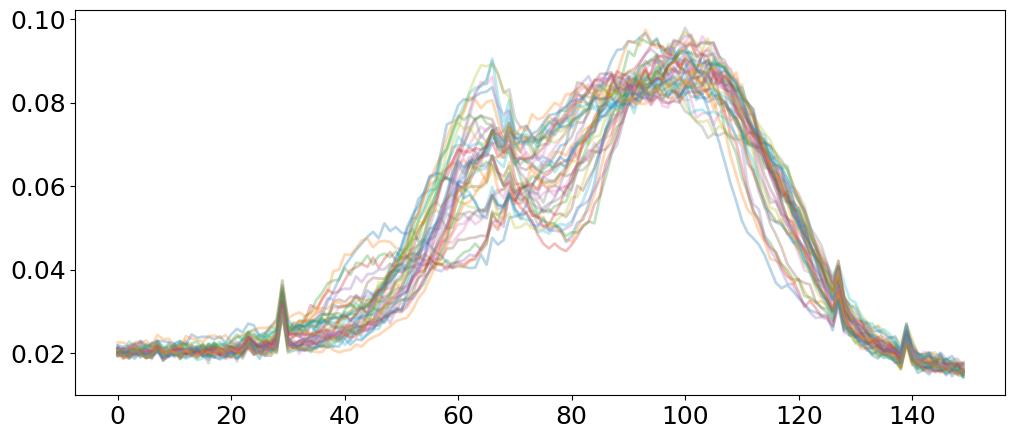

In [115]:
plt.figure(figsize=[12,5])
for t  in range(0,420,10):
    plt.plot(mean_spec_off_limb[t,450:600], alpha=0.3, linewidth = 2, label='t = '+str(t))
#plt.legend()

Text(0, 0.5, 'Time')

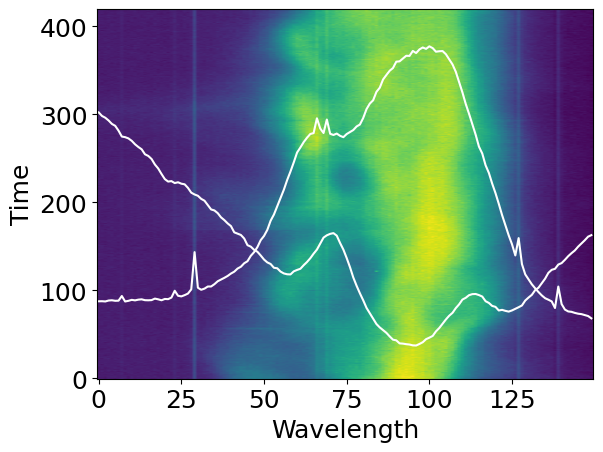

In [145]:
plt.imshow(mean_spec_off_limb[0:420, 450:600], origin='lower',aspect='auto')
plt.plot(np.mean(mean_spec_off_limb, axis=0)[450:600]*4500, color='white')
plt.plot(np.mean(mean_spec_inside_limb, axis=0)[450:600]*2000-200, color='white')
plt.xlabel("Wavelength")
plt.ylabel("Time")

In [117]:
mean_spec_inside_limb = np.mean(spectra[:,1300:1400,:],axis=1)

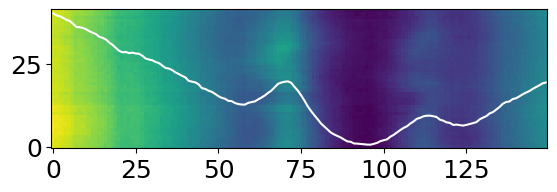

In [130]:
plt.imshow(mean_spec_inside_limb[0:420:10, 450:600], origin='lower')
plt.plot(np.mean(mean_spec_inside_limb, axis=0)[450:600]*300-35, color='white')

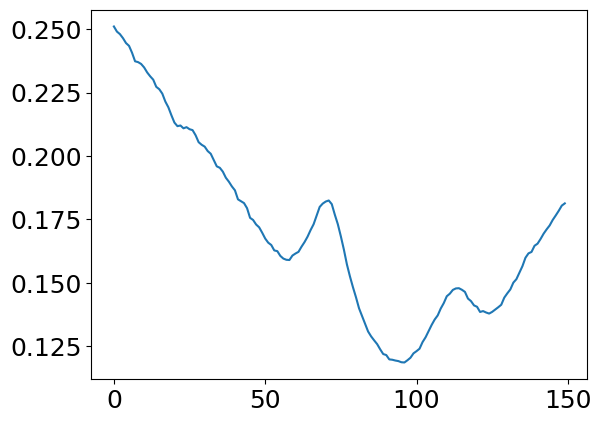

In [120]:
plt.plot(np.mean(mean_spec_inside_limb, axis=0)[450:600])

### Find the limb For the simulations:

(860.0, 890.0)

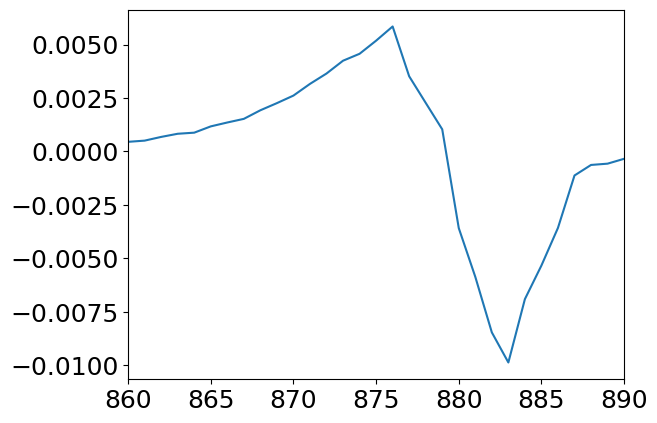

In [131]:
plt.plot(np.gradient(np.gradient(synth_spec[:,1865])))
plt.xlim([860,890])

In [132]:
synth_limbdistances = limbdistances = -(np.arange(NX) - 880)*19.25

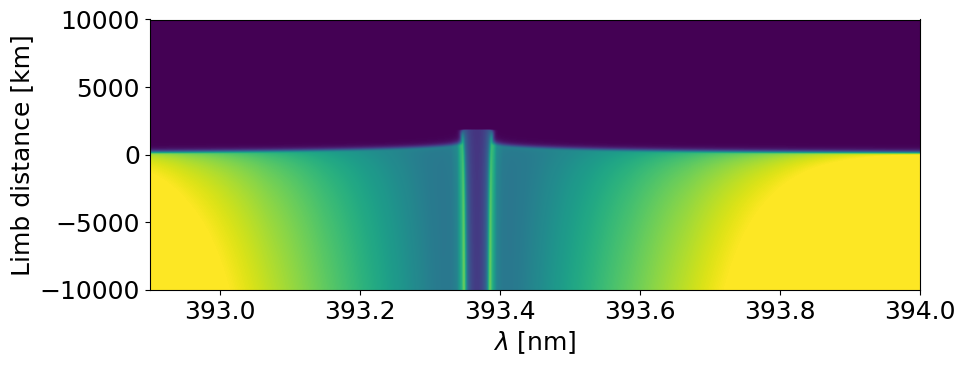

In [133]:
plt.figure(figsize=[10,4])
plt.imshow(synth_spec[:,:], origin='lower', extent=[susi_wavegrid[0],susi_wavegrid[-1], synth_limbdistances[0], synth_limbdistances[-1]], aspect='auto',vmin=0, vmax=0.5)
plt.ylim([-10000,10000])
plt.xlim([392.9, 394])
plt.xlabel("$\lambda$ [nm]")
plt.ylabel("Limb distance [km]")
plt.tight_layout()
plt.savefig("limb_spectra_2D_sim.png", bbox_inches='tight')

## But noone is preventing us from modeling things a little bit below:

In [139]:
mean_obs_on_disk = np.mean(mean[784:784+500,0,:], axis=0)
mean_sim_on_disk = np.mean(synth_spec[880:880+500,:], axis=0)

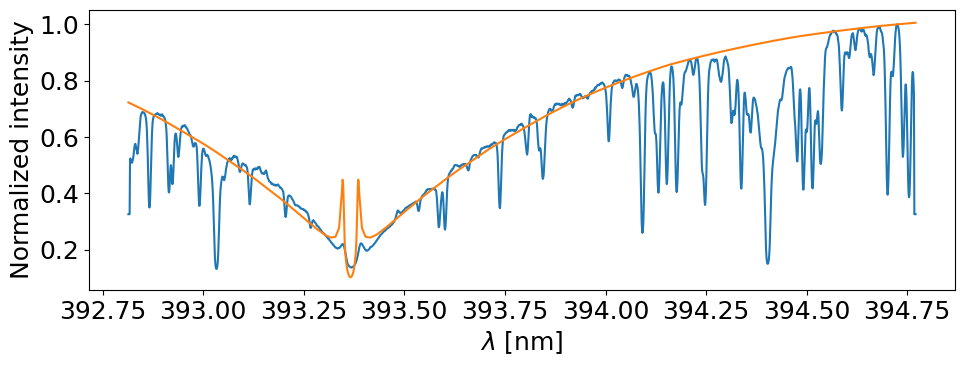

In [141]:
plt.figure(figsize=[10,4])
plt.plot(susi_wavegrid, mean_obs_on_disk/np.max(mean_obs_on_disk[1865]))
plt.plot(susi_wavegrid, mean_sim_on_disk/np.max(mean_sim_on_disk[1865]))
plt.xlabel("$\lambda$ [nm]")
plt.ylabel("Normalized intensity")
plt.tight_layout()
plt.savefig("lw_vs_susi_disk.png",bbox_inches='tight')

In [142]:
mean_obs_limb = np.mean(mean[764:784,0,:], axis=0)
mean_sim_limb = np.mean(synth_spec[860:880,:], axis=0)

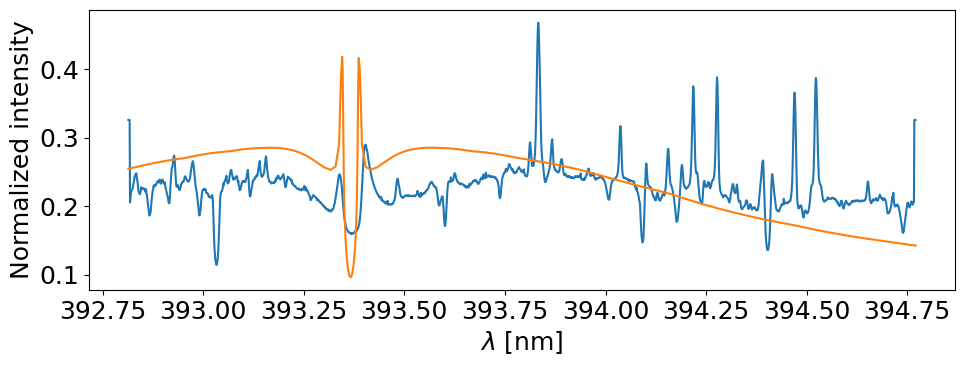

In [144]:
plt.figure(figsize=[10,4])
plt.plot(susi_wavegrid, mean_obs_limb/(mean_obs_on_disk[1865]))
plt.plot(susi_wavegrid, mean_sim_limb/(mean_sim_on_disk[1865]))
plt.xlabel("$\lambda$ [nm]")
plt.ylabel("Normalized intensity")
plt.tight_layout()
plt.savefig("lw_vs_susi_limb.png",bbox_inches='tight')